# Ackley

<img src="https://static.packt-cdn.com/products/9781789612011/graphics/assets/85b0e665-49d0-4773-ae1e-184f18b0e898.png" />

we have two types of learning:
1. based on the derivatives > GD
2. random based algorithms > genetic algorithms

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# xi > x has i dimensions
# x:m*n > m points with n dimensions
# x:1 dimension:(m,) > 1 point with m dimensions
# if we want to give m points with 1 dim > we have to have x:m*1
def ackley(x):
    a=20
    b=0.2
    c=2
    return (-a*np.exp(-b*np.sqrt(np.mean(x**2,axis=-1))))-(np.exp(np.mean(np.cos(c*np.pi*x),axis=-1)))+a+np.e

In [4]:
x = np.arange(-2,2)
print(x)
print(x.shape)
print(np.mean(x))

# m points with 1 dim > out must be m numbers
x=x.reshape(-1,1)
print(np.mean(x))
print(np.mean(x,axis=-1))

x = np.arange(-10,10).reshape(-1,2)
print(x)
print(np.mean(x,axis=-1))

x = np.arange(-10,10).reshape(-1,2)
print(np.mean(x**2,axis=-1))
print(np.mean(x**2))

[-2 -1  0  1]
(4,)
-0.5
-0.5
[-2. -1.  0.  1.]
[[-10  -9]
 [ -8  -7]
 [ -6  -5]
 [ -4  -3]
 [ -2  -1]
 [  0   1]
 [  2   3]
 [  4   5]
 [  6   7]
 [  8   9]]
[-9.5 -7.5 -5.5 -3.5 -1.5  0.5  2.5  4.5  6.5  8.5]
[90.5 56.5 30.5 12.5  2.5  0.5  6.5 20.5 42.5 72.5]
33.5


In [5]:
x = np.arange(-10,10,0.1)
x = x.reshape(-1,1)
# we have m points in 1 dimension
print(x.shape)
y = ackley(x)
print(y[:2], y.shape)

(200, 1)
[17.29329434 17.71119772] (200,)


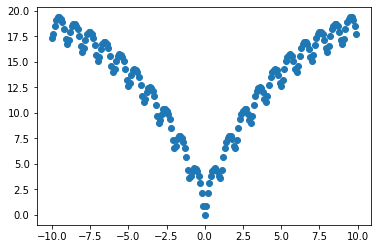

In [6]:
plt.plot(x,y,'o')

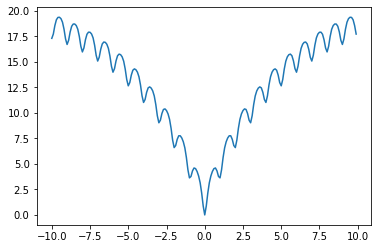

In [7]:
plt.plot(x,y)

In [8]:
'''
completely wrong > you have just one axis which is x
'''
# x = np.arange(-200,200,0.1)
# x=x.reshape(-1,2)
# z=ackley(x)
# z=z.reshape(-1,1)

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(projection='3d')
# # two axis not one and dulicate !!!!
# surf = ax.plot_surface(x,x,z, cmap='viridis', edgecolor='none')

# plt.show()

'\ncompletely wrong > you have just one axis which is x\n'

(100, 100) (100, 100)


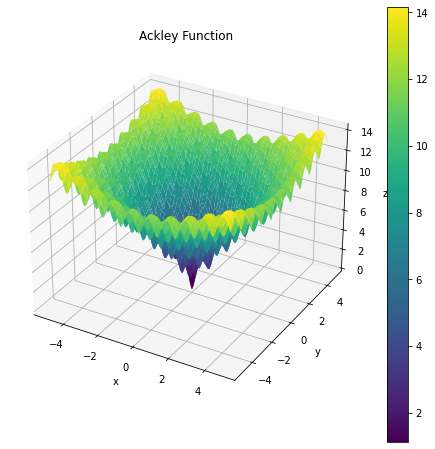

In [9]:
x = np.arange(-5,5,0.1)
# create axis 
x1, x2 = np.meshgrid(x,x)
print(x1.shape, x2.shape)
z = np.zeros_like(x1) #400*400

for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i,j] = ackley(np.array([x1[i,j], x2[i,j]]))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x1, x2, z, cmap='viridis', edgecolor='none')
# Add color bar and labels
fig.colorbar(surf)
ax.set_title('Ackley Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Show plot
plt.show()

# Population

In [10]:
np.random.random() #[0,1]

0.21309148380369614

In [11]:
# 1000 nodes in 10 dims
# the values are the points in the ackley function
# if between 0 and 1 > it is near the main min > so scale it to make it as far as possible
population = np.random.random(size=(1000, 10)) * 20 - 10
print(population.min(), population.max()) #[-10,10]
print(ackley(population)[:2]) #(1000,1)

-9.999884380714024 9.998083437813897
[17.62304434 16.50871359]


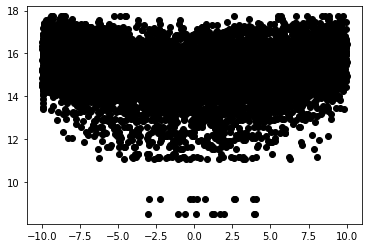

In [12]:
plt.plot(population, ackley(population), 'ko')

In [64]:
# roulette role
t = np.random.random()
print(t)
'''
we have 3 individuals with this probs: 0.3, 0.5, 0.2
0.2 > 0.2 > P(0<x<0.2)=20%
0.3 > 0.5 > P(0.2<x<0.5)=30%
0.5 > 1 > P(0.5<x<1)=50%
find the t range > choose one of the outputs
'''
x = [0.5,0.2, 0.3]
print(sorted(x))
print(np.sort(x))
x_s = np.sort(x)
print(np.cumsum(x_s))

# decrese to reach to the index > reverse cumsum
for i in range(3):
    if t < x_s[i]:
        print(i)
    else:
        t = t - x_s[i]

print(np.random.choice(x)) #random item
print(np.random.choice(np.arange(len(x)))) #random index
print(np.random.choice(np.arange(len(x)), size=3)) # with repeat
print(np.random.choice(np.arange(len(x)), size=3, replace=False)) # without repeat
# probability that each entity will be selected > p

0.568310732841527
[0.2, 0.3, 0.5]
[0.2 0.3 0.5]
[0.2 0.5 1. ]
2
0.2
0
[1 1 0]
[1 2 0]


In [65]:
def parent_selection(fitness):
    selection_prob = fitness / np.sum(fitness)
    
    idx = np.arange(fitness.shape[0])
    parent_idx = np.random.choice(idx, size=fitness.shape[0], p=selection_prob)
    
    # # choose less from the first ind
    # selection_prob_sorted = np.sort(selection_prob)
    # parent_idx = np.random.choice(idx, size=fitness.shape[0], p=selection_prob_sorted)
    # plt.hist(parent_idx, bins=200)
    # plt.show()

    return parent_idx

In [77]:
def crossover(parents):
    offsprings = parents.copy() #1000*10
    # 0, 2, 4, ... > [0,1]-[2,3]
    for i in range(0,parents.shape[0],2):
        # crossover parent[i], parent[i+1]
        mask = np.random.randint(0,2,size=parents.shape[1]) #binary array 10*1
        offsprings[i, mask==1] = parents[i+1, mask==1]
        offsprings[i+1, mask==1] = parents[i, mask==1]
    return offsprings

In [78]:
def mutation(offsprings):
    mask = np.random.random(size=offsprings.shape) > 0.7 #T/F
    new_values = np.random.random(size=(1000,10)) *20 - 10
    
    offsprings[mask==1] = new_values[mask==1]

    return offsprings

In [79]:
# I want to guide the population to the min point
population = np.random.random(size=(1000, 10)) * 20 - 10
for i in range(10):
    # y out must be min > near to 0 [min func]
    error = ackley(population)
    # genetic algo can give more than one good answer
    # the answers must differ > if same > the algo converge so not desired
    print(error.min(), error.mean(), error.max()) 
    # fitness must be positive: err<20
    fitness = 20 - error

    parent_idx = parent_selection(fitness)
    parents = population[parent_idx]
    # now each 2 items are the chromosomes

    offsprings = crossover(parents)
    offsprings = mutation(offsprings)

    # mean is contant so it is not desired

10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378
10.983319180016839 15.197308738710392 17.860436044256378


In [80]:
x = np.arange(-2,2,0.1).reshape(-1,5)
y = np.arange(-3,3,0.1).reshape(-1,5)

print(x.shape, y.shape)
print(np.vstack((x,y)).shape)

(8, 5) (12, 5)
(20, 5)


In [81]:
# I want to guide the population to the min point

best_fitness = []
mean_fitness = []

for i in range(1000):
    # y out must be min > near to 0 [min func]
    error = ackley(population)
    # genetic algo can give more than one good answer
    # the answers must differ > if same > the algo converge so not desired
    print(error.min(), error.mean(), error.max()) 
    best_fitness.append(error.min())
    mean_fitness.append(error.mean())
    # fitness must be positive: err<20
    fitness = 20 - error

    parent_idx = parent_selection(fitness)
    parents = population[parent_idx]
    # now each 2 items are the chromosomes

    offsprings = crossover(parents)
    offsprings = mutation(offsprings)

    # mean is contant so it is not desired
    population = np.vstack((population, offsprings))
    # sort base on the ackley output 
    population = np.array(sorted(population, key=ackley))[:1000]

10.983319180016839 15.197308738710392 17.860436044256378
10.004939171432229 14.235142827284646 15.231716211780965
10.004939171432229 13.555788376902395 14.533059313744435
7.671429588387777 12.954505768520585 13.957468355345336
7.671429588387777 12.409659678967182 13.399321950032208
7.671429588387777 11.95880432919833 12.944747076046129
6.362289860261882 11.509384835058485 12.52218048363112
6.362289860261882 11.146920353543148 12.127936029664365
6.362289860261882 10.82664276733014 11.771737495409862
6.362289860261882 10.479118202477126 11.468322214370515
6.362289860261882 10.209590064146738 11.176760104876287
6.362289860261882 9.96333493775931 10.935814361418222
6.362289860261882 9.727708203590574 10.669164145828876
5.756248225457568 9.527471829981797 10.45911687431833
5.756248225457568 9.338504446388137 10.248398563229815
5.756248225457568 9.14517983852854 10.041311720487757
5.756248225457568 8.94332151723915 9.833638959016195
5.167297318334821 8.776209110275945 9.672044865616312
5.167

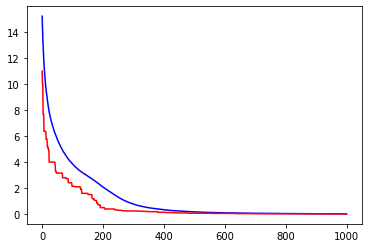

In [82]:
plt.plot(mean_fitness, 'b-')
plt.plot(best_fitness, 'r-')
plt.show()